# Import the required libraries

In [1]:
import time
import warnings
warnings.filterwarnings('ignore')

# For loading data and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For cleaning the text
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# For export the dataframe and load
import pickle

# Loading the datasets

In [2]:
df_legacy = pd.read_csv('data/legacy_data.csv')
df_legacy.head()

,Unnamed: 0,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
0,0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0
1,1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0
2,2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0
3,3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0
4,4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [3]:
df_sample = pd.read_csv('data/sample_output.csv')
df_sample.head()

,Unnamed: 0,OrderID,GiftBox
0,0,171890429,"1985,4312"
1,1,171890412,"4443,5234"
2,2,171890410,"3823,4729,1002"
3,3,171890399,"4991,5236"
4,4,171890387,"1859,5061,5249"


In [4]:
df_inventory = pd.read_csv('data/inventory.csv')
df_inventory.head()

,Unnamed: 0,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


# Getting one with the data

### Taking insights from Legacy data

In [5]:
df_legacy.head()

,Unnamed: 0,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
0,0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0
1,1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0
2,2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0
3,3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0
4,4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [6]:
# Dropping the Unnamed columns
df_legacy.drop(columns=['Unnamed: 0'], inplace=True)
df_legacy.head()

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0
1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0
2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0
3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0
4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [7]:
# Shape of the legacy data
df_legacy.shape

(1000, 6)

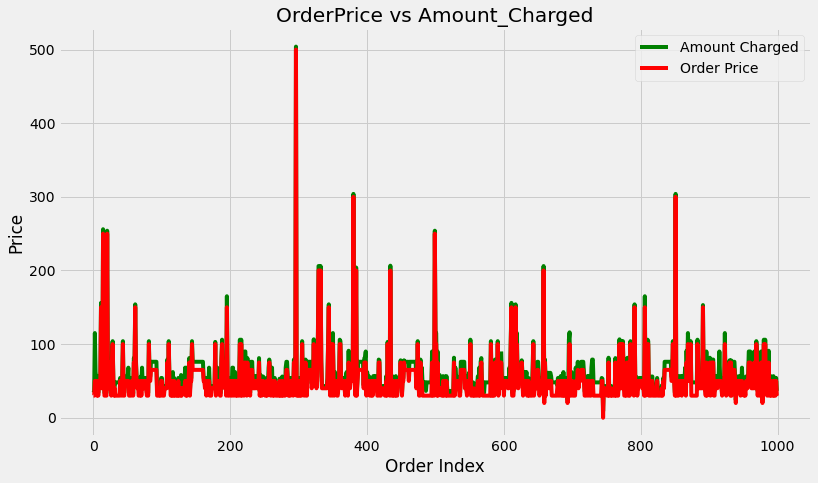

In [8]:
# Creating a plot between the 'OrderPrice' and 'Amount_Charged'
plt.figure(figsize=(12,7))
plt.plot(df_legacy['Amount_Charged'], c='g', label='Amount Charged')
plt.plot(df_legacy['OrderPrice'], c='r', label='Order Price')
plt.title('OrderPrice vs Amount_Charged')
plt.legend()
plt.xlabel('Order Index')
plt.ylabel('Price')
plt.show()

In [9]:
# Checking for the null data
df_legacy.isnull().sum()

OrderID           0
OrderPrice        0
Amount_Charged    1
GiftBox           0
Preferences       0
Rating            0
dtype: int64

In [10]:
# Fetching the null row
df_legacy[df_legacy.isnull().any(axis=1)]

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
595,171888616,40,NaN,"1859,5061",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [11]:
# Drop the null value row
df_legacy.dropna(inplace=True)

In [12]:
# Check for duplicated
df_legacy[df_legacy.duplicated()]

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
626,171889514,75,78.0,"4729,4831,4271,4700",I don’t drink coffee or tea 🤭$$$ Healthy Sweet...,0
627,171889449,50,62.0,"4865,5043,2241",I'm a coffee person ☕️$$$I like coffee but I d...,0
628,171889327,30,48.0,"4607,4879",I don’t drink coffee or tea 🤭$$$ Savories and ...,0


In [13]:
# Drop duplicates
df_legacy.drop_duplicates(inplace=True)
df_legacy.shape

(996, 6)

In [14]:
# Removing the outliers i.e. all the records which has 'OrderPrice less than 25 and more than 120'
df_legacy = df_legacy[df_legacy['OrderPrice'] < 120]
df_legacy = df_legacy[df_legacy['OrderPrice'] > 25]

In [15]:
# New shape of the legacy data
df_legacy.shape

(969, 6)

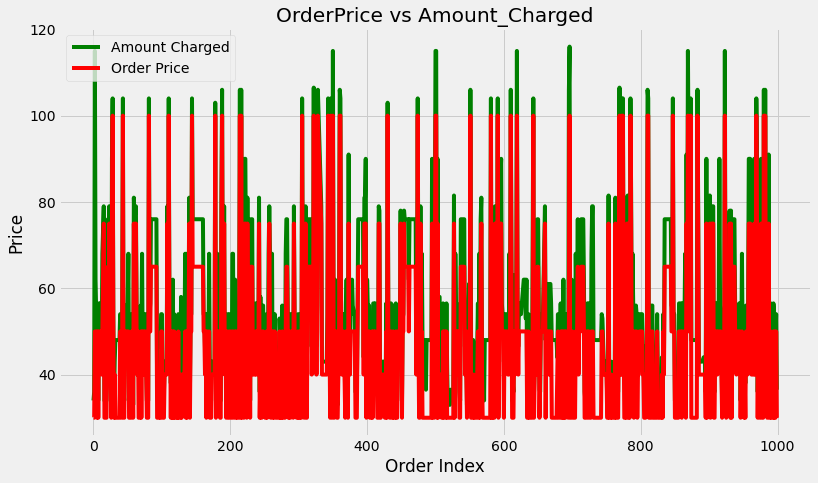

In [16]:
# Plot between the 'OrderPrice' and 'Amount_Charged'
plt.figure(figsize=(12,7))
plt.plot(df_legacy['Amount_Charged'], c='g', label='Amount Charged')
plt.plot(df_legacy['OrderPrice'], c='r', label='Order Price')
plt.title('OrderPrice vs Amount_Charged')
plt.legend()
plt.xlabel('Order Index')
plt.ylabel('Price')
plt.show()

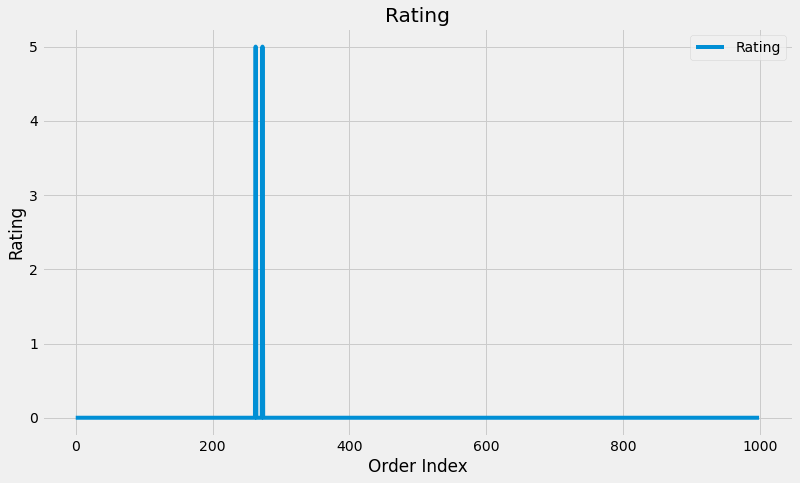

In [17]:
# Plot for the ratings
plt.figure(figsize=(12,7))
plt.plot(df_legacy['Rating'], label='Rating')
plt.title('Rating')
plt.legend()
plt.xlabel('Order Index')
plt.ylabel('Rating')
plt.show()

In [18]:
# Removing legacy data of products which has rating greater than 0 (behaves like outlier)
df_legacy = df_legacy[df_legacy['Rating'] == 0]
df_legacy.shape

(967, 6)

In [19]:
# Reset the index after removing some rows
df_legacy.reset_index(inplace=True, drop=True)

### Taking insights from Sample data

In [20]:
df_sample.head()

,Unnamed: 0,OrderID,GiftBox
0,0,171890429,"1985,4312"
1,1,171890412,"4443,5234"
2,2,171890410,"3823,4729,1002"
3,3,171890399,"4991,5236"
4,4,171890387,"1859,5061,5249"


In [21]:
# Dropping the Unnamed columns
df_sample.drop(columns=['Unnamed: 0'], inplace=True)
df_sample.head()

,OrderID,GiftBox
0,171890429,"1985,4312"
1,171890412,"4443,5234"
2,171890410,"3823,4729,1002"
3,171890399,"4991,5236"
4,171890387,"1859,5061,5249"


In [22]:
# Shape of the sample data
df_sample.shape

(1000, 2)

In [23]:
# Check for the null value row
df_sample.isnull().sum()

OrderID    0
GiftBox    0
dtype: int64

In [24]:
# Check for duplicated
df_sample[df_sample.duplicated()]

,OrderID,GiftBox
626,171889514,"4729,4831,4271,4700"
627,171889449,"4865,5043,2241"
628,171889327,"4607,4879"


In [25]:
# Drop duplicates
df_sample.drop_duplicates(inplace=True)
df_sample.shape

(997, 2)

In [26]:
# Reset the index after removing some rows
df_sample.reset_index(inplace=True, drop=True)

### Taking insights from Inventory data

In [27]:
df_inventory.head()

,Unnamed: 0,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


In [28]:
# Dropping the Unnamed columns
df_inventory.drop(columns=['Unnamed: 0'], inplace=True)
df_inventory.head()

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


In [29]:
# Shape of the inventory data
df_inventory.shape

(342, 8)

In [30]:
# Check for the null value rows
df_inventory.isnull().sum()

ProductId          0
ProductName        0
Cost               0
Price              0
Rating             0
ProductTag         0
AvalQuantity       0
BoxDimensions    125
dtype: int64

In [31]:
# Check for duplicated
df_inventory[df_inventory.duplicated()]

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions


In [32]:
# Check for duplicated product names
df_inventory[df_inventory['ProductName'].duplicated()]

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
328,5061,Wine Aerator,12.0,27.0,4.2353,"wine,accessory,LiquorAccessory",16,NaN


In [33]:
# Drop duplicated product name records
df_inventory.drop([328], inplace=True)

In [34]:
df_inventory.shape

(341, 8)

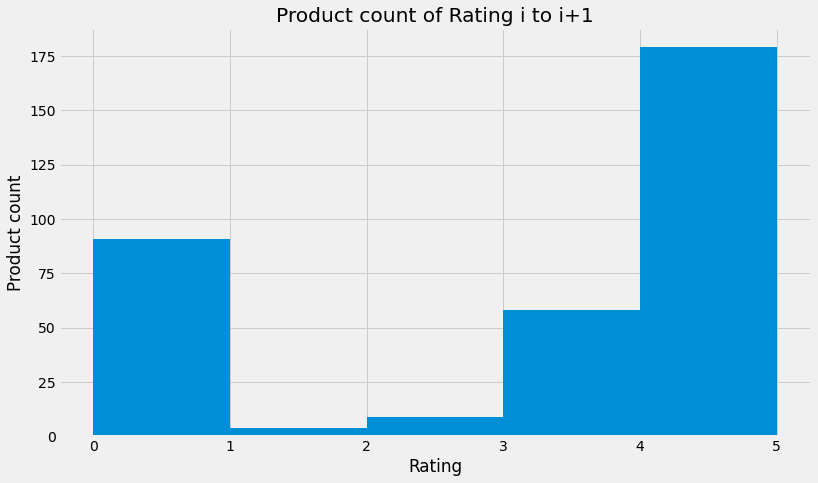

In [35]:
# Plot for number of products which has rating between 0 to 1, 1 to 2 and so on
plt.figure(figsize=(12,7))
plt.hist(df_inventory['Rating'], range(6))
plt.title('Product count of Rating i to i+1')
plt.xlabel('Rating')
plt.ylabel('Product count')
plt.show()

In [36]:
# Reset the index after removing some rows
df_inventory.reset_index(inplace=True, drop=True)

### Remove data from Legacy on the basis of gift product id which is not available in Inventory

In [37]:
# Taking all the product id's available in Inventory
product_ids = df_inventory['ProductId'].values
product_ids, len(product_ids)

(array([ 245,  278,  351,  424,  700,  744, 1002, 1014, 1090, 1091, 1101,
        1102, 1107, 1179, 1183, 1189, 1195, 1200, 1201, 1205, 1220, 1260,
        1308, 1319, 1323, 1636, 1768, 1769, 1786, 1800, 1804, 1826, 1840,
        1848, 1858, 1859, 1863, 1902, 1903, 1904, 1909, 1910, 1985, 1988,
        1995, 1996, 1997, 1998, 2000, 2001, 2038, 2076, 2080, 2088, 2132,
        2169, 2192, 2233, 2240, 2241, 2251, 2253, 2268, 2296, 2307, 2311,
        2313, 2318, 2345, 2352, 2378, 2390, 2426, 2457, 2506, 2507, 2536,
        2594, 2817, 2825, 2838, 2839, 2840, 2841, 2887, 2934, 2935, 2936,
        2992, 2994, 2996, 2999, 3002, 3008, 3041, 3045, 3073, 3077, 3080,
        3081, 3084, 3085, 3163, 3168, 3184, 3186, 3187, 3190, 3200, 3204,
        3207, 3208, 3209, 3211, 3212, 3213, 3223, 3240, 3255, 3278, 3301,
        3328, 3395, 3396, 3490, 3491, 3493, 3519, 3520, 3546, 3571, 3587,
        3591, 3592, 3595, 3596, 3597, 3598, 3599, 3600, 3610, 3625, 3628,
        3629, 3630, 3631, 3635, 3641, 

In [38]:
# Helper function to know whether product id exist in inventory or not
def available_inventory(gift_box):
    ids = list(map(int, gift_box.split(',')))
    for id in ids:
        if id not in product_ids:
            return False
    return True

In [39]:
# Taking intersection from the product id available in GiftBox and store it availability status as a new column
df_legacy['Available_Inventory'] = df_legacy['GiftBox'].apply(available_inventory)
df_legacy.head()

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating,Available_Inventory
0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0,True
1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0,True
2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0,True
3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0,True
4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0,False


In [40]:
df_legacy.shape

(967, 7)

In [41]:
# All Product id in Legacy data are available in inventory
df_legacy = df_legacy[df_legacy['Available_Inventory'] == True]
df_legacy.shape

(890, 7)

In [42]:
# Reset the index after removing some rows
df_legacy.reset_index(inplace=True, drop=True)

# Create a dataset for the content based filtering

In [43]:
df_inventory.head()

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


In [44]:
# Adding a new column tag
df_inventory['Tag'] = df_inventory['ProductName'] + ' ' + df_inventory['ProductTag']

In [45]:
df_inventory.head()

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions,Tag
0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3,Guatemalan Signature Roast Ground Coffee coffe...
1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2,"Los Gigantes Colombia (Coffee Beans) coffee, a..."
2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN,Rowkin Bit Charge Stereo (Silver) music
3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN,Chocolate Fruit and Nut Dragee Sampler sweet
4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3,Pro Lens Kit for Phone Camera photography


In [46]:
# Creating object of tokenizer and lemmatizer
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

In [47]:
# Function to clean the Tag column in inventory
def clean(row):
    # convert into lower character
    row = row.lower()
    # split string into words
    words = tokenizer.tokenize(row)
    # remove stop words and apply lemmatization
    words = [lemmatizer.lemmatize(word.strip()) for word in words if word not in stopwords.words('english')]
    # convert word into string again and return
    return ' '.join(words)

In [48]:
%%time
# Applying clean tag function to transform the text
df_inventory['Tag'] = df_inventory['Tag'].apply(clean)

CPU times: user 888 ms, sys: 80.8 ms, total: 969 ms
Wall time: 761 ms


In [49]:
df_inventory.head()

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions,Tag
0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3,guatemalan signature roast ground coffee coffe...
1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2,los gigantes colombia coffee bean coffee artis...
2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN,rowkin bit charge stereo silver music
3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN,chocolate fruit nut dragee sampler sweet
4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3,pro lens kit phone camera photography


In [50]:
# Taking required columns for recommendation into new dataframe
df_inventory_final = df_inventory[['ProductId', 'ProductName', 'ProductTag', 'Rating', 'Cost', 'Price', 'Tag']]
df_inventory_final.head()

,ProductId,ProductName,ProductTag,Rating,Cost,Price,Tag
0,245,Guatemalan Signature Roast Ground Coffee,"coffee, ground",4.4427,13.78,25.99,guatemalan signature roast ground coffee coffe...
1,278,Los Gigantes Colombia (Coffee Beans),"coffee, artisanal",4.3185,10.75,20.00,los gigantes colombia coffee bean coffee artis...
2,351,Rowkin Bit Charge Stereo (Silver),music,4.0000,64.00,102.99,rowkin bit charge stereo silver music
3,424,Chocolate Fruit and Nut Dragee Sampler,sweet,4.4643,21.00,35.00,chocolate fruit nut dragee sampler sweet
4,700,Pro Lens Kit for Phone Camera,photography,4.3588,24.50,42.99,pro lens kit phone camera photography


In [51]:
# Shape of the final inventory data
df_inventory_final.shape

(341, 7)

# Create a dataset for predictive modeling

In [52]:
df_legacy.head()

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating,Available_Inventory
0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0,True
1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0,True
2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0,True
3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0,True
4,171890375,30,34.0,"4962,5043",I’m more of a tea person 🍵$$$Any specialty tea...,0,True


In [53]:
# Create a new dataframe of legacy data
df_legacy_final = pd.DataFrame(columns=['Preferences', 'Category'])

for i in range(df_legacy.shape[0]):
    ids = list(map(int, df_legacy['GiftBox'][i].split(',')))
    preference = df_legacy['Preferences'][i]
    for id in ids:
        category = df_inventory[df_inventory['ProductId'] == id]['ProductTag'].values[0]
        df_legacy_final.loc[len(df_legacy_final.index)] = [preference, clean(category)]
        #categories = df_inventory[df_inventory['ProductId'] == id]['ProductTag'].values[0].split(',')
        #for category in categories:
        #    if category not in ['', '1', '2']:
        #        df_legacy_final.loc[len(df_legacy_final.index)] = [preference, category.lower().strip()]

In [54]:
# Shape of the final legacy data
df_legacy_final.shape

(2202, 2)

In [55]:
# Check for the duplicate column
df_legacy_final[df_legacy_final.duplicated()]

,Preferences,Category
114,I'm a coffee person ☕️$$$I like coffee but I d...,wine accessory liquoraccessory
123,I'm a coffee person ☕️$$$I like coffee but I d...,sweet
139,I'm a coffee person ☕️$$$I like coffee but I d...,health fitness
224,I'm a coffee person ☕️$$$I like to brew regula...,coffee ground
225,I'm a coffee person ☕️$$$I like to brew regula...,healthy treat
...,...,...
1990,I don’t drink coffee or tea 🤭$$$ Healthy Sweet...,hard liquor accessory liquoraccessory
2023,I'm a coffee person ☕️$$$I love to make pour o...,coffee artisanal
2126,I don’t drink coffee or tea 🤭$$$Diabetic $$$ ...,smart product
2185,I'm a coffee person ☕️$$$I love to make pour o...,sweet


In [56]:
# Drop duplicated
df_legacy_final.drop_duplicates(inplace=True)

In [57]:
# Shape of the final legacy data
df_legacy_final.shape

(2119, 2)

In [58]:
# Reset the index after removing some rows
df_legacy_final.reset_index(inplace=True, drop=True)

In [59]:
# Unique Category in final legacy data
df_legacy_final['Category'].unique()

array(['decaf', 'sweet', 'hard liquor accessory liquoraccessory',
       'wine accessory liquoraccessory', 'gadget', 'tea',
       'coffee artisanal', 'coffee tea health fitness outdoor',
       'smart product', 'healthy treat', 'coffee ground', 'savoury',
       'tea decaf', 'photography', 'health fitness', 'hard liquor',
       'tea tea bag', 'savoury gluten free non gmo kosher vegan',
       'gadget outdoor', 'homeware', 'music', 'health fitness outdoor',
       'instant', 'accessory hard liquor liquoraccessory',
       'healthy treat healthy treat', 'wine', 'smart product music',
       'kid 1', 'kid 1 2', 'snack healthy gluten free poleo vegan',
       'snack keto gluten free poleo vegan', 'coffee'], dtype=object)

In [60]:
# Number of unique Category in final legacy data
df_legacy_final['Category'].nunique()

32

[]

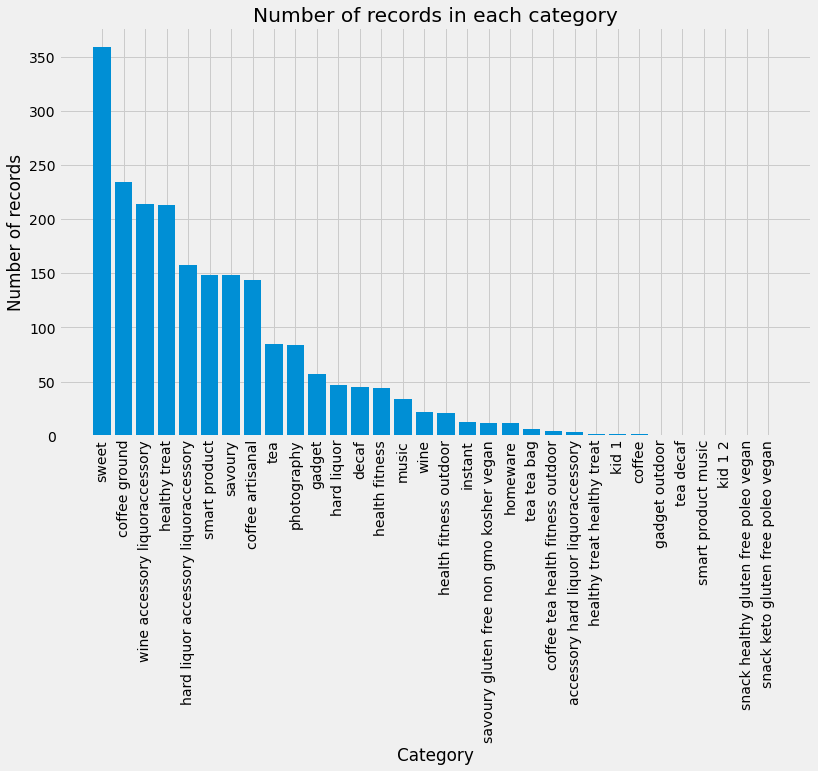

In [61]:
# Plot for the count of number of uniques 'Category' values
plt.figure(figsize=(12, 7))
plt.bar(df_legacy_final['Category'].value_counts().index, df_legacy_final['Category'].value_counts().values)
plt.title('Number of records in each category')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Number of records')
plt.plot()

### Remove the categories that has less than 30 records

In [62]:
# all the categories which has record more than 30
category_bool = df_legacy_final['Category'].value_counts() > 30
category_bool

sweet                                        True
coffee ground                                True
wine accessory liquoraccessory               True
healthy treat                                True
hard liquor accessory liquoraccessory        True
smart product                                True
savoury                                      True
coffee artisanal                             True
tea                                          True
photography                                  True
gadget                                       True
hard liquor                                  True
decaf                                        True
health fitness                               True
music                                        True
wine                                        False
health fitness outdoor                      False
instant                                     False
savoury gluten free non gmo kosher vegan    False
homeware                                    False


In [63]:
# name of the categories
categories = category_bool[category_bool].index
categories

Index(['sweet', 'coffee ground', 'wine accessory liquoraccessory',
       'healthy treat', 'hard liquor accessory liquoraccessory',
       'smart product', 'savoury', 'coffee artisanal', 'tea', 'photography',
       'gadget', 'hard liquor', 'decaf', 'health fitness', 'music'],
      dtype='object')

In [64]:
# update dataframe which has only categories that has record more than 30
df_legacy_final = df_legacy_final[df_legacy_final['Category'].isin(categories)]
df_legacy_final.head()

,Preferences,Category
0,I’m more of a tea person 🍵$$$I prefer herbal/d...,decaf
1,I’m more of a tea person 🍵$$$I prefer herbal/d...,sweet
2,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",hard liquor accessory liquoraccessory
3,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",sweet
4,I'm a coffee person ☕️$$$I like coffee but I d...,wine accessory liquoraccessory


In [65]:
# Shape of the final legacy data
df_legacy_final.shape

(2014, 2)

In [66]:
# Reset the index after removing some rows
df_legacy_final.reset_index(inplace=True, drop=True)

In [67]:
# Unique Category in final legacy data
df_legacy_final['Category'].unique()

array(['decaf', 'sweet', 'hard liquor accessory liquoraccessory',
       'wine accessory liquoraccessory', 'gadget', 'tea',
       'coffee artisanal', 'smart product', 'healthy treat',
       'coffee ground', 'savoury', 'photography', 'health fitness',
       'hard liquor', 'music'], dtype=object)

In [68]:
# Number of unique Category in final legacy data
df_legacy_final['Category'].nunique()

15

[]

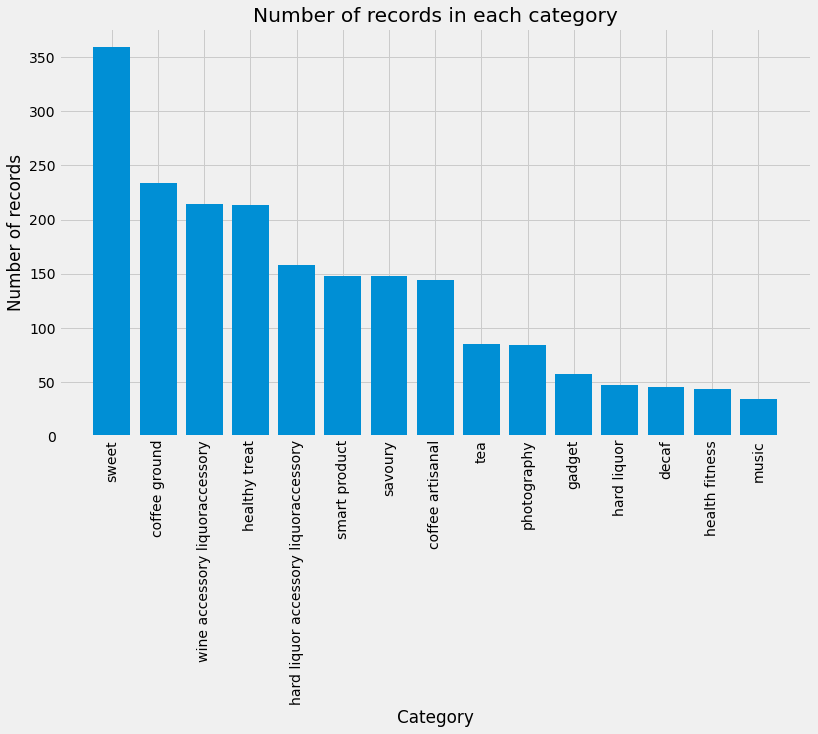

In [69]:
# Plot for the count of number of uniques 'Category' values
plt.figure(figsize=(12, 7))
plt.bar(df_legacy_final['Category'].value_counts().index, df_legacy_final['Category'].value_counts().values)
plt.title('Number of records in each category')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Number of records')
plt.plot()

# Export the data frame

In [70]:
pickle.dump(df_inventory_final, open('eda_data/recommendation.pkl', 'wb'))
pickle.dump(df_legacy_final, open('eda_data/predict.pkl', 'wb'))